In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)
#df.head()

In [44]:
def analyze_df(df, head_rows=5):
    print(f"1. First {head_rows} rows of data:\n")
    display(df.head())

    print(f"\n 2. Data Info:\n")
    display(df.info())

    print(f"\n 3. Description of Data:\n")
    display(df.describe().transpose())

    print(f" 4. Missing Values: \n")
    missing_values = df.isnull().sum()
    display(missing_values)

In [46]:
analyze_df(confirmed_df, head_rows=5)

1. First 5 rows of data:



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704



 2. Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1154 entries, UID to 3/9/23
dtypes: float64(3), int64(1145), object(6)
memory usage: 29.4+ MB


None


 3. Description of Data:



,count,mean,std,min,25%,50%,75%,max
UID,3342.0,8.342992e+07,4.314076e+06,16.0000,8.401811e+07,8.402921e+07,8.404612e+07,8.410000e+07
code3,3342.0,8.344949e+02,3.648738e+01,16.0000,8.400000e+02,8.400000e+02,8.400000e+02,8.500000e+02
FIPS,3332.0,3.304308e+04,1.864881e+04,60.0000,1.907650e+04,3.101200e+04,4.712950e+04,9.999900e+04
Lat,3342.0,3.672162e+01,9.079322e+00,-14.2710,3.389680e+01,3.800561e+01,4.157926e+01,6.931479e+01
Long_,3342.0,-8.864205e+01,2.177629e+01,-174.1596,-9.780360e+01,-8.948886e+01,-8.231340e+01,1.456739e+02
...,...,...,...,...,...,...,...,...
3/5/23,3342.0,3.101346e+04,1.083090e+05,0.0000,2.920250e+03,7.724500e+03,2.031275e+04,3.705381e+06
3/6/23,3342.0,3.101602e+04,1.083152e+05,0.0000,2.920250e+03,7.724500e+03,2.031950e+04,3.705381e+06
3/7/23,3342.0,3.102660e+04,1.083322e+05,0.0000,2.923000e+03,7.735500e+03,2.033450e+04,3.705381e+06
3/8/23,3342.0,3.104601e+04,1.083601e+05,0.0000,2.917500e+03,7.735500e+03,2.034500e+04,3.705381e+06


 4. Missing Values: 



UID        0
iso2       0
iso3       0
code3      0
FIPS      10
          ..
3/5/23     0
3/6/23     0
3/7/23     0
3/8/23     0
3/9/23     0
Length: 1154, dtype: int64

In [47]:
# analyze data with only a couple dates
confirmed_df_crop = confirmed_df[['UID', 'code3', 'FIPS', 'Lat', 'Long_', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20']]
confirmed_df_crop.dropna()
confirmed_df_crop.head()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20
0,84001001,840,1001.0,32.539527,-86.644082,0,0,0,0,0,0,0
1,84001003,840,1003.0,30.727750,-87.722071,0,0,0,0,0,0,0
2,84001005,840,1005.0,31.868263,-85.387129,0,0,0,0,0,0,0
3,84001007,840,1007.0,32.996421,-87.125115,0,0,0,0,0,0,0
4,84001009,840,1009.0,33.982109,-86.567906,0,0,0,0,0,0,0


In [48]:
analyze_df(deaths_df, head_rows=5)

1. First 5 rows of data:



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261



 2. Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1155 entries, UID to 3/9/23
dtypes: float64(3), int64(1146), object(6)
memory usage: 29.4+ MB


None


 3. Description of Data:



,count,mean,std,min,25%,50%,75%,max
UID,3342.0,8.342992e+07,4.314076e+06,16.0000,8.401811e+07,8.402921e+07,8.404612e+07,8.410000e+07
code3,3342.0,8.344949e+02,3.648738e+01,16.0000,8.400000e+02,8.400000e+02,8.400000e+02,8.500000e+02
FIPS,3332.0,3.304308e+04,1.864881e+04,60.0000,1.907650e+04,3.101200e+04,4.712950e+04,9.999900e+04
Lat,3342.0,3.672162e+01,9.079322e+00,-14.2710,3.389680e+01,3.800561e+01,4.157926e+01,6.931479e+01
Long_,3342.0,-8.864205e+01,2.177629e+01,-174.1596,-9.780360e+01,-8.948886e+01,-8.231340e+01,1.456739e+02
...,...,...,...,...,...,...,...,...
3/5/23,3342.0,3.357672e+02,1.105746e+03,0.0000,3.800000e+01,1.020000e+02,2.460000e+02,3.545300e+04
3/6/23,3342.0,3.357813e+02,1.105773e+03,0.0000,3.800000e+01,1.020000e+02,2.460000e+02,3.545300e+04
3/7/23,3342.0,3.358815e+02,1.105924e+03,0.0000,3.800000e+01,1.020000e+02,2.467500e+02,3.545300e+04
3/8/23,3342.0,3.360999e+02,1.106231e+03,0.0000,3.900000e+01,1.020000e+02,2.467500e+02,3.545300e+04


 4. Missing Values: 



UID        0
iso2       0
iso3       0
code3      0
FIPS      10
          ..
3/5/23     0
3/6/23     0
3/7/23     0
3/8/23     0
3/9/23     0
Length: 1155, dtype: int64

In [49]:
from datetime import datetime

# renaming columns in confirmed_df
for col in confirmed_df.columns:
    try:
        str_col = str(col)
        date = datetime.strptime(str_col, "%m/%d/%y")
        new_col_name = f"confirmed_{date.strftime('%m/%d/%y')}"
        confirmed_df.rename(columns={col: new_col_name}, inplace=True)
    except ValueError:
        pass

# renaming columns in deaths_df
for col in deaths_df.columns:
    try:
        str_col = str(col)
        date = datetime.strptime(str_col, "%m/%d/%y")
        new_col_name = f"deaths_{date.strftime('%m/%d/%y')}"
        deaths_df.rename(columns={col: new_col_name}, inplace=True)
    except ValueError:
        pass
    
print("Confirmed DataFrame columns:", confirmed_df.columns)
print("Deaths DataFrame columns:", deaths_df.columns)

Confirmed DataFrame columns: Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       'confirmed_02/28/23', 'confirmed_03/01/23', 'confirmed_03/02/23',
       'confirmed_03/03/23', 'confirmed_03/04/23', 'confirmed_03/05/23',
       'confirmed_03/06/23', 'confirmed_03/07/23', 'confirmed_03/08/23',
       'confirmed_03/09/23'],
      dtype='object', length=1154)
Deaths DataFrame columns: Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       'deaths_02/28/23', 'deaths_03/01/23', 'deaths_03/02/23',
       'deaths_03/03/23', 'deaths_03/04/23', 'deaths_03/05/23',
       'deaths_03/06/23', 'deaths_03/07/23', 'deaths_03/08/23',
       'deaths_03/09/23'],
      dtype='object', length=1155)


In [53]:
display(confirmed_df.tail())
display(deaths_df.tail())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,confirmed_02/28/23,confirmed_03/01/23,confirmed_03/02/23,confirmed_03/03/23,confirmed_03/04/23,confirmed_03/05/23,confirmed_03/06/23,confirmed_03/07/23,confirmed_03/08/23,confirmed_03/09/23
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,12130,12130,12130,12130,12130,12130,12130,12134,12134,12134
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,6401,6401,6401,6401,6401,6401,6401,6406,6406,6406
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2750,2750,2750,2750,2750,2750,2750,2755,2755,2755
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,deaths_02/28/23,deaths_03/01/23,deaths_03/02/23,deaths_03/03/23,deaths_03/04/23,deaths_03/05/23,deaths_03/06/23,deaths_03/07/23,deaths_03/08/23,deaths_03/09/23
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,16,16,16,16,16,16,16,16,16,16
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,43,43,43,43,43,43,43,43,43,43
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,50,50,50,50,50,50,50,51,51,51
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,23,23,23,23,23,23,23,23,23,23


In [56]:
# merge the confirmed and deaths dfs

merged_df = pd.merge(confirmed_df, deaths_df, 
                     on=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_'], 
                     suffixes=('_confirmed', '_deaths'))

In [58]:
merged_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,deaths_02/28/23,deaths_03/01/23,deaths_03/02/23,deaths_03/03/23,deaths_03/04/23,deaths_03/05/23,deaths_03/06/23,deaths_03/07/23,deaths_03/08/23,deaths_03/09/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261


In [62]:
merged_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       'deaths_02/28/23', 'deaths_03/01/23', 'deaths_03/02/23',
       'deaths_03/03/23', 'deaths_03/04/23', 'deaths_03/05/23',
       'deaths_03/06/23', 'deaths_03/07/23', 'deaths_03/08/23',
       'deaths_03/09/23'],
      dtype='object', length=2299)

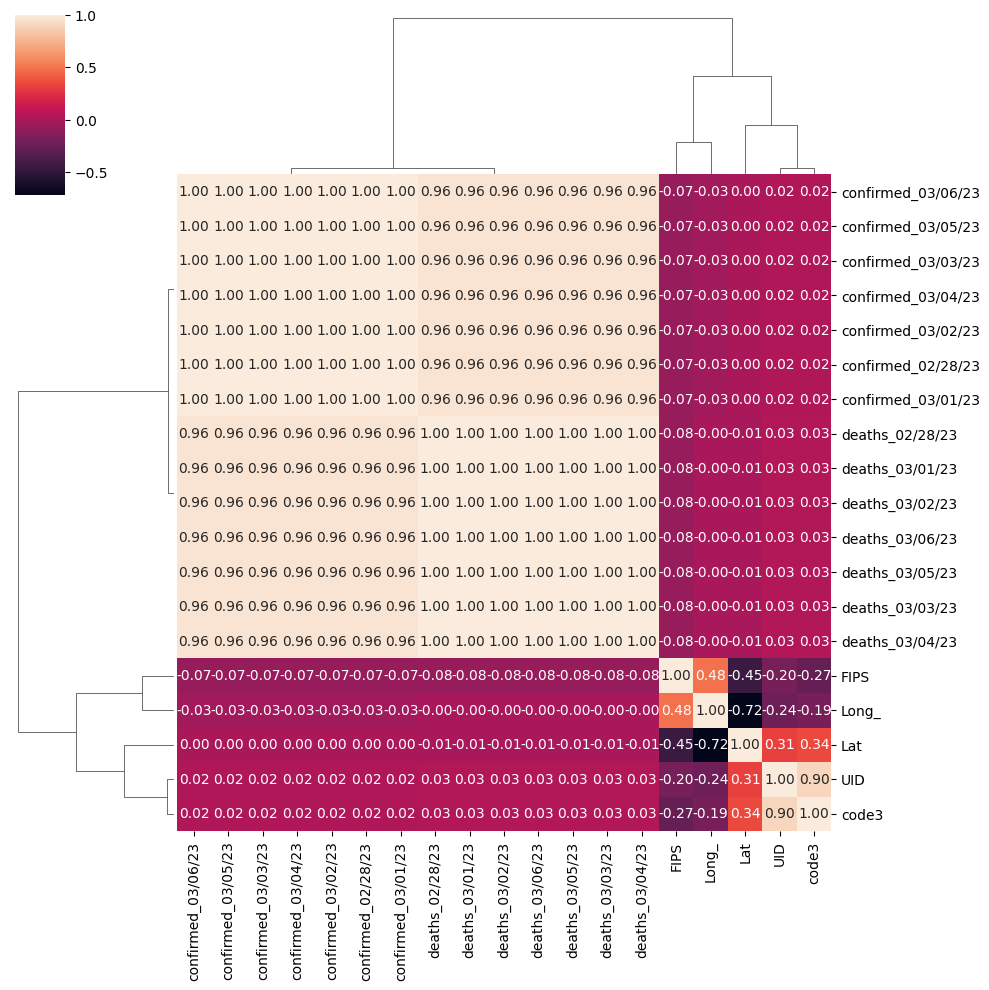

In [68]:
df_cropped = merged_df[['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'confirmed_02/28/23', 'confirmed_03/01/23', 'confirmed_03/02/23',
       'confirmed_03/03/23', 'confirmed_03/04/23', 'confirmed_03/05/23',
       'confirmed_03/06/23', 'deaths_02/28/23', 'deaths_03/01/23', 'deaths_03/02/23',
       'deaths_03/03/23', 'deaths_03/04/23', 'deaths_03/05/23', 'deaths_03/06/23']]

# analyzing a week 
corr_matrix = df_cropped.corr(numeric_only = True)
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.clustermap(corr_matrix,
              annot=True,
              figsize=(10,10),
              fmt='.2f')

In [82]:
m= merged_df.isna().sum().sum()
print(m)
merged_df.dropna()

16


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,deaths_02/28/23,deaths_03/01/23,deaths_03/02/23,deaths_03/03/23,deaths_03/04/23,deaths_03/05/23,deaths_03/06/23,deaths_03/07/23,deaths_03/08/23,deaths_03/09/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,16,16,16,16,16,16,16,16,16,16
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,43,43,43,43,43,43,43,43,43,43
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,50,50,50,50,50,50,50,51,51,51


In [86]:
merged_df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,deaths_02/28/23,deaths_03/01/23,deaths_03/02/23,deaths_03/03/23,deaths_03/04/23,deaths_03/05/23,deaths_03/06/23,deaths_03/07/23,deaths_03/08/23,deaths_03/09/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,16,16,16,16,16,16,16,16,16,16
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,43,43,43,43,43,43,43,43,43,43
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,50,50,50,50,50,50,50,51,51,51
